In [1]:
# collaborative based filtering 
# Dataset: https://www.kaggle.com/datasets/shivamb/netflix-shows

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# loading data

In [3]:
df = pd.read_csv("netflix_titles.csv")
df.head(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,24-Sep-21,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,24-Sep-21,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24-Sep-21,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,24-Sep-21,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


# data cleaning

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.drop(columns=['show_id', 'date_added'], axis=1, inplace=True)

In [6]:
df.rename(columns={"type":"Type", "title":"Title", "director":"Director Name",
                  "cast":"Cast", "country":"Country", "release_year": "Release Year", "rating":"Rating",
                  "duration":"Duration", "listed_in":"Genre", "description":"Description"}, inplace=True)
df

,Type,Title,Director Name,Cast,Country,Release Year,Rating,Duration,Genre,Description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [7]:
df.fillna('', inplace = True)
df["Old Combined Text"] = df["Type"] + " " + df["Title"] + " " + df["Director Name"] + " " + df["Cast"] + " " + df["Country"] + " " + df["Release Year"].astype(str) + " " + df["Rating"] + " " + df["Duration"] + " " + df["Genre"] + " " + df["Description"]
df["Combined Text"] = df["Title"] + " " + df["Cast"] + " " + df["Country"] + " " + df["Rating"] + " " + df["Genre"] + " " + df["Description"]
df

,Type,Title,Director Name,Cast,Country,Release Year,Rating,Duration,Genre,Description,Old Combined Text,Combined Text
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Movie Dick Johnson Is Dead Kirsten Johnson Un...,Dick Johnson Is Dead United States PG-13 Docu...
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","TV Show Blood & Water Ama Qamata, Khosi Ngema...","Blood & Water Ama Qamata, Khosi Ngema, Gail Ma..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,TV Show Ganglands Julien Leclercq Sami Bouajil...,"Ganglands Sami Bouajila, Tracy Gotoas, Samuel ..."
3,TV Show,Jailbirds New Orleans,,,,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",TV Show Jailbirds New Orleans 2021 TV-MA 1 ...,"Jailbirds New Orleans TV-MA Docuseries, Real..."
4,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"TV Show Kota Factory Mayur More, Jitendra Kum...","Kota Factory Mayur More, Jitendra Kumar, Ranja..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...","Movie Zodiac David Fincher Mark Ruffalo, Jake ...","Zodiac Mark Ruffalo, Jake Gyllenhaal, Robert D..."
8803,TV Show,Zombie Dumb,,,,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",TV Show Zombie Dumb 2018 TV-Y7 2 Seasons Ki...,"Zombie Dumb TV-Y7 Kids' TV, Korean TV Shows,..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Movie Zombieland Ruben Fleischer Jesse Eisenbe...,"Zombieland Jesse Eisenberg, Woody Harrelson, E..."
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","Movie Zoom Peter Hewitt Tim Allen, Courteney C...","Zoom Tim Allen, Courteney Cox, Chevy Chase, Ka..."


In [8]:
df['Combined Text'].head()

0    Dick Johnson Is Dead  United States PG-13 Docu...
1    Blood & Water Ama Qamata, Khosi Ngema, Gail Ma...
2    Ganglands Sami Bouajila, Tracy Gotoas, Samuel ...
3    Jailbirds New Orleans   TV-MA Docuseries, Real...
4    Kota Factory Mayur More, Jitendra Kumar, Ranja...
Name: Combined Text, dtype: object

# eda

In [9]:
df.duplicated().sum()

3

In [10]:
df.describe()

,Release Year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Type               8807 non-null   object
 1   Title              8807 non-null   object
 2   Director Name      8807 non-null   object
 3   Cast               8807 non-null   object
 4   Country            8807 non-null   object
 5   Release Year       8807 non-null   int64 
 6   Rating             8807 non-null   object
 7   Duration           8807 non-null   object
 8   Genre              8807 non-null   object
 9   Description        8807 non-null   object
 10  Old Combined Text  8807 non-null   object
 11  Combined Text      8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


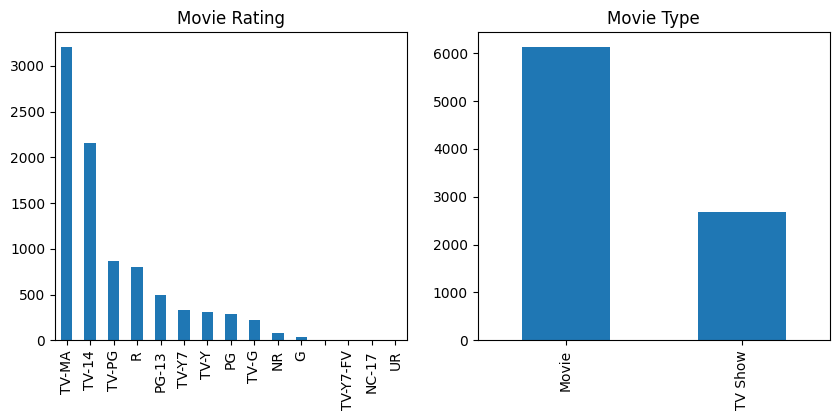

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
movie_rating = df['Rating'].value_counts().plot(kind='bar',
                                    title="Movie Rating", ax=ax1)
movie_type = df['Type'].value_counts().plot(kind='bar',
                                    title="Movie Type", ax=ax2)

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Movie/TV Show Count')]

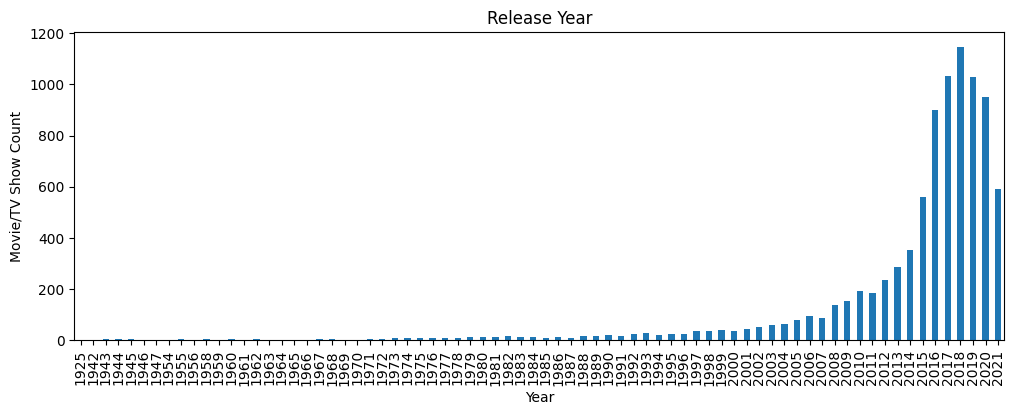

In [13]:
release_year = df['Release Year'].value_counts().sort_index().plot(kind='bar',
                                    figsize=(12,4),
                                    title="Release Year")
release_year.set(xlabel='Year', ylabel='Movie/TV Show Count')

In [14]:
copy_df = df.copy()

In [15]:
genre = copy_df['Genre']
genre_explode = genre.str.rsplit(',').explode('Genre')
genre_explode

0                   Documentaries
1          International TV Shows
2                       TV Dramas
3                    TV Mysteries
4                  Crime TV Shows
                   ...           
19318    Children & Family Movies
19319                    Comedies
19320                      Dramas
19321        International Movies
19322            Music & Musicals
Name: Genre, Length: 19323, dtype: object

[Text(0.5, 0, 'Genre'), Text(0, 0.5, 'Movie/TV Show Count')]

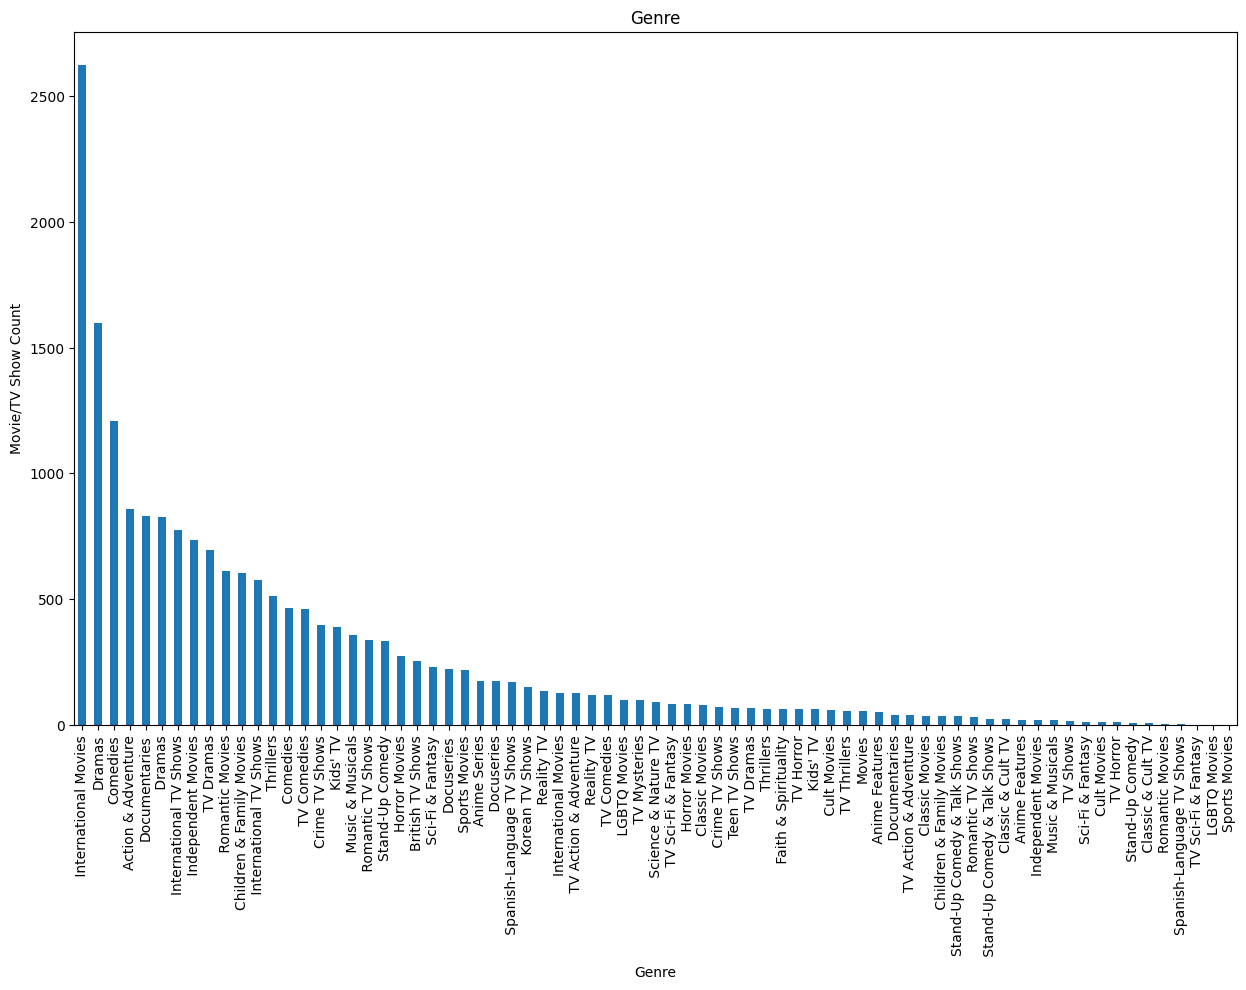

In [16]:
genre_plot = genre_explode.value_counts().plot(kind='bar',
                                    figsize=(15,9),
                                    title="Genre")
genre_plot.set(xlabel='Genre', ylabel='Movie/TV Show Count')

In [17]:
country = copy_df['Country']
country_explode = country.str.rsplit(',').explode("Country")
country_explode.dropna(inplace=True)
country_explode.value_counts()

United States     3211
India             1008
                   838
United Kingdom     628
 United States     479
                  ... 
Senegal              1
 Uganda              1
 Liechtenstein       1
Mozambique           1
 Ecuador             1
Name: Country, Length: 197, dtype: int64

[Text(0.5, 0, 'Country'), Text(0, 0.5, 'Movie/TV Show Count')]

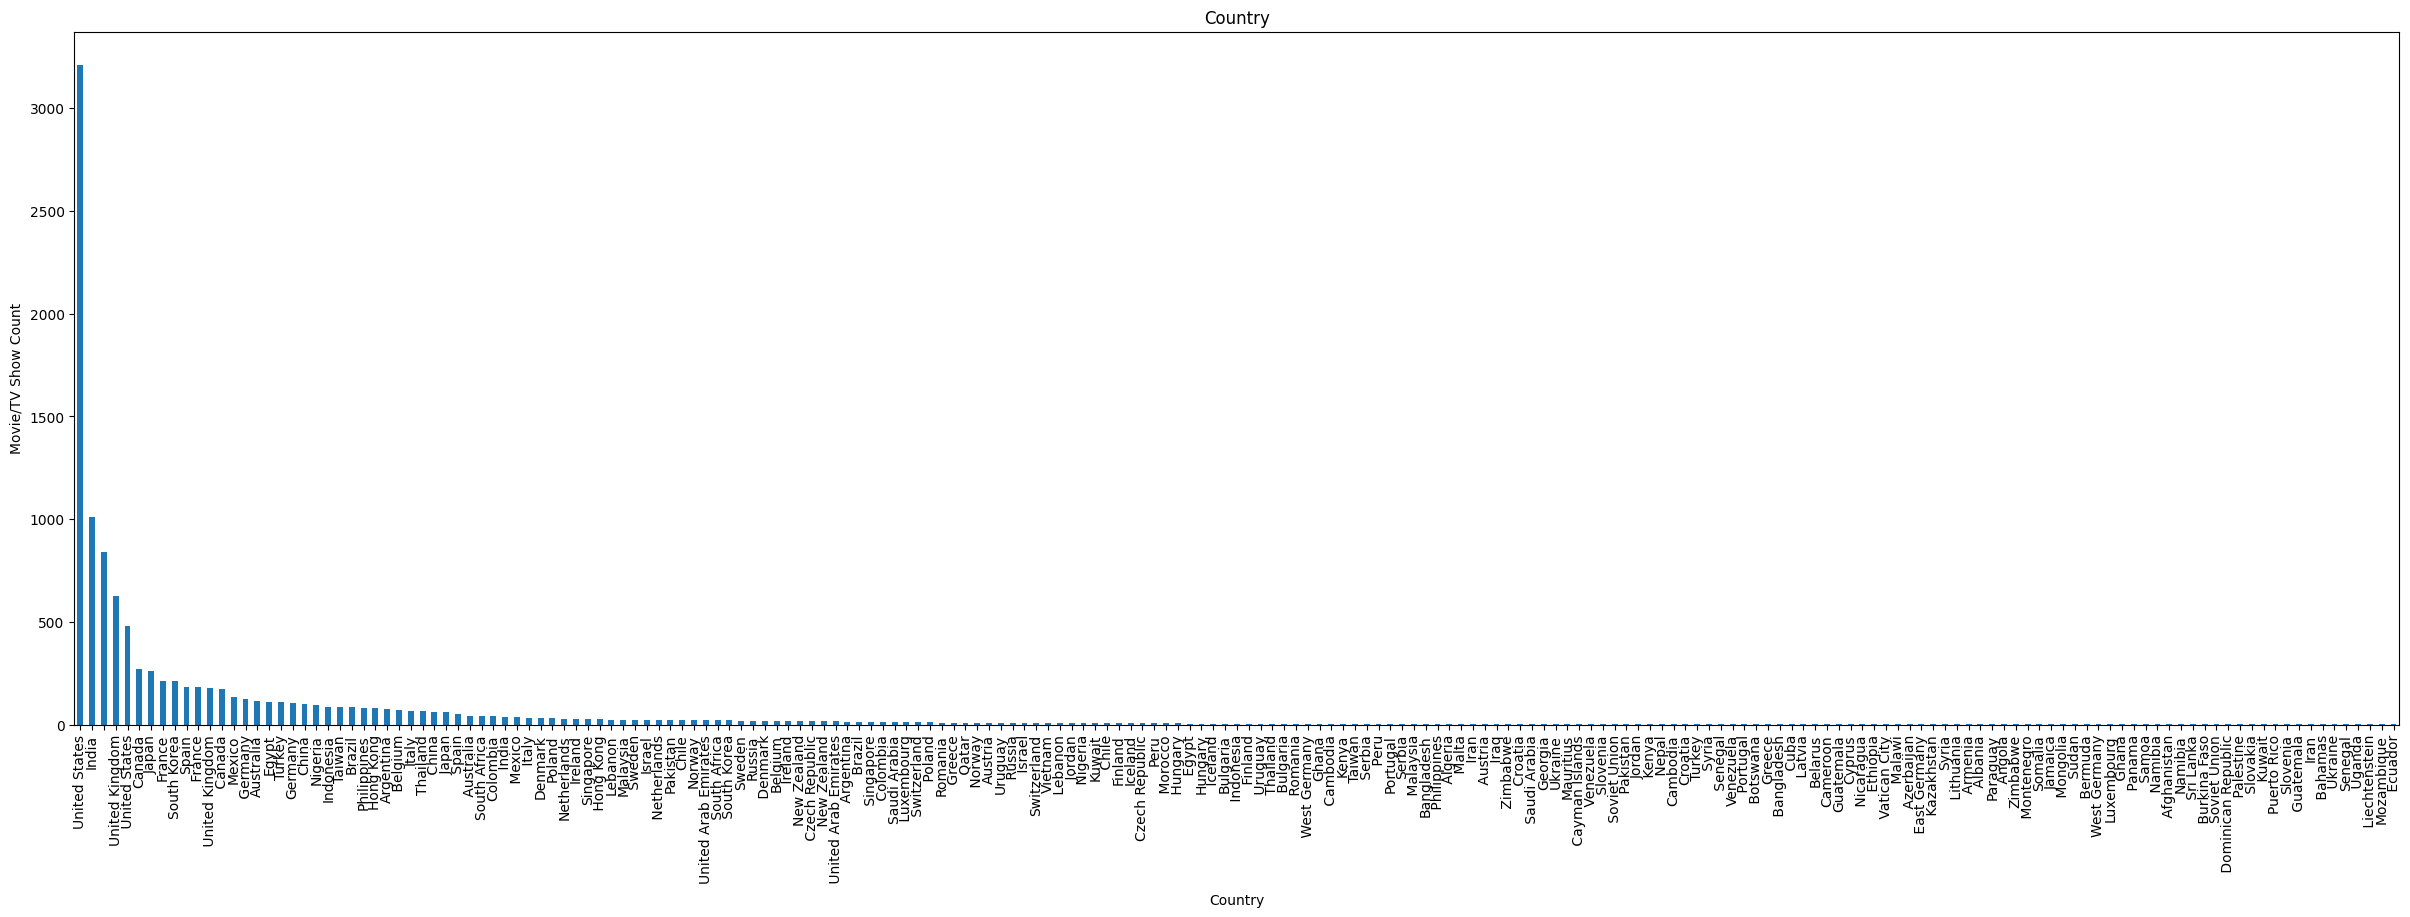

In [18]:
country_plot = country_explode.value_counts().plot(kind='bar',
                                    figsize=(30,9),
                                    title="Country")
country_plot.set(xlabel='Country', ylabel='Movie/TV Show Count')

# tf-idf vectorizer

In [19]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Combined Text']) #returns tfidf-weighted document-term matrix
tfidf_matrix

<8807x50209 sparse matrix of type '<class 'numpy.float64'>'
	with 321922 stored elements in Compressed Sparse Row format>

A sparse matrix is a matrix containing mainly zeros.

In [21]:
# print(tfidf_matrix)
# (documentID, tokenID) weight
# in each row, has the weights of each word per movie
matrix = pd.DataFrame(tfidf_matrix)
matrix.head(7)

,0
0,"(0, 20949)\t0.30762753158223133\n (0, 14764..."
1,"(0, 5533)\t0.10595422718820427\n (0, 433)\t..."
2,"(0, 47950)\t0.09995360102930834\n (0, 46048..."
3,"(0, 39990)\t0.1057936090696573\n (0, 17953)..."
4,"(0, 7349)\t0.1755415682494694\n (0, 30897)\..."
5,"(0, 4845)\t0.1309346072099079\n (0, 11609)\..."
6,"(0, 11651)\t0.12788243673607982\n (0, 19161..."


In [22]:
#vocabulary_ returns a mapping of terms to feature indicies
tfidf.vocabulary_

{'dick': 11884,
 'johnson': 22395,
 'dead': 11026,
 'united': 46492,
 'states': 42496,
 'pg': 34048,
 '13': 18,
 'documentaries': 12377,
 'father': 15067,
 'nears': 30982,
 'end': 13905,
 'life': 25836,
 'filmmaker': 15435,
 'kirsten': 24019,
 'stages': 42390,
 'death': 11053,
 'inventive': 21286,
 'comical': 9389,
 'ways': 48096,
 'help': 19305,
 'face': 14764,
 'inevitable': 20949,
 'blood': 5760,
 'water': 48057,
 'ama': 1882,
 'qamata': 35670,
 'khosi': 23785,
 'ngema': 31229,
 'gail': 16480,
 'mabalane': 26719,
 'thabang': 44651,
 'molaba': 29598,
 'dillon': 11983,
 'windvogel': 48546,
 'natasha': 30803,
 'thahane': 44662,
 'arno': 2928,
 'greeff': 17831,
 'xolile': 48960,
 'tshabalala': 45924,
 'getmore': 17028,
 'sithole': 41300,
 'cindy': 8903,
 'mahlangu': 27018,
 'ryle': 38329,
 'morny': 29846,
 'greteli': 17877,
 'fincham': 15461,
 'sello': 39836,
 'maake': 26706,
 'ka': 22743,
 'ncube': 30964,
 'odwa': 32075,
 'gwanya': 18280,
 'mekaila': 28573,
 'mathys': 27972,
 'sandi': 

In [23]:
#feature names sorted by indicies
pd.DataFrame(tfidf.get_feature_names_out())

,0
0,000
1,007
2,009
3,10
4,100
...,...
50204,반드시
50205,영웅의
50206,잡는다
50207,최강전사


In [24]:
# create matrix to determine the correlation of the movies
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.00593441, 0.02061521,
        0.        ],
       [0.        , 1.        , 0.01530836, ..., 0.        , 0.        ,
        0.00507777],
       [0.        , 0.01530836, 1.        , ..., 0.        , 0.00465198,
        0.00916234],
       ...,
       [0.00593441, 0.        , 0.        , ..., 1.        , 0.05066929,
        0.00178627],
       [0.02061521, 0.        , 0.00465198, ..., 0.05066929, 1.        ,
        0.00684137],
       [0.        , 0.00507777, 0.00916234, ..., 0.00178627, 0.00684137,
        1.        ]])

In [25]:
indices = pd.Series(df.index,index=df['Title'])
indices

Title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Zodiac                   8802
Zombie Dumb              8803
Zombieland               8804
Zoom                     8805
Zubaan                   8806
Length: 8807, dtype: int64

In [26]:
#cosine similarities for Dick Johnson Is Dead
cosim = list(enumerate(cosine_sim[0]))
cosim

[(0, 1.0000000000000002),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.00854397147477458),
 (5, 0.0),
 (6, 0.005611162226604691),
 (7, 0.0065899441508825395),
 (8, 0.029723489428897243),
 (9, 0.03171446602484321),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.005280694872731519),
 (14, 0.0),
 (15, 0.01376283407255633),
 (16, 0.019796904425804743),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.022291391802695428),
 (23, 0.0),
 (24, 0.01786898069737623),
 (25, 0.0),
 (26, 0.024373784273134066),
 (27, 0.023472607405269037),
 (28, 0.03137058571335323),
 (29, 0.023847238649080244),
 (30, 0.008888345407595259),
 (31, 0.0),
 (32, 0.0022226721350184207),
 (33, 0.0),
 (34, 0.0),
 (35, 0.01328648039813931),
 (36, 0.0),
 (37, 0.0),
 (38, 0.02160798993910288),
 (39, 0.0),
 (40, 0.00506713771237397),
 (41, 0.01028756373663953),
 (42, 0.01088552347588908),
 (43, 0.011040352152934918),
 (44, 0.024382938385652066),
 (45, 0.021674639210573925),
 (46, 0.005155501745774723),
 (47, 0.0),
 (

In [27]:
tmp = sorted(cosim, key=lambda x: x[1], reverse=True)[1:11] #most similar movie has a score of 0.21
print(tmp)
[i[0] for i in tmp] #get indicies of top 10 similar movies

[(4877, 0.2072466209089081), (5233, 0.1979826760199559), (7015, 0.14305086196404976), (6398, 0.12282364192396614), (3927, 0.12210561302192688), (5894, 0.1176953573514538), (5797, 0.11141885492798076), (5540, 0.10785610820626651), (6038, 0.10402098345455645), (129, 0.10267893385643045)]


[4877, 5233, 7015, 6398, 3927, 5894, 5797, 5540, 6038, 129]

In [28]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) #sorted in descending order
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df[['Title','Genre','Description']].iloc[movie_indices]

# sentence transformers

In [29]:
import torch
from sentence_transformers import SentenceTransformer, util

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
'''paraphrase-distilroberta-base-v1 is a sentence-transformers model: It maps sentences & paragraphs 
to a 768 dimensional dense vector space and can be used for tasks like clustering or semantic search.
https://huggingface.co/sentence-transformers/paraphrase-distilroberta-base-v1'''

model = SentenceTransformer('paraphrase-distilroberta-base-v1') #pre-trained SentenceTransformers model
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: RobertaModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [31]:
'''description = df['Description'].tolist()
des_embeddings = []
for i,des in enumerate(description):
    des_embeddings.append(model.encode(des))'''

"description = df['Description'].tolist()\ndes_embeddings = []\nfor i,des in enumerate(description):\n    des_embeddings.append(model.encode(des))"

In [32]:
#np.save("/work/des_embeddings.npy")
des_embeddings = np.load('description_embeddings.npy')
pd.DataFrame(des_embeddings)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.134037,0.616408,0.292251,0.278848,-0.592038,-0.129972,0.085834,0.246445,0.269920,0.145430,...,-0.237771,0.433799,0.245889,0.183288,-0.067981,0.130860,-0.149361,-0.756074,-0.068839,0.363505
1,0.213402,-0.164151,0.061150,0.262656,0.630825,0.006786,0.176997,0.408800,0.063345,0.234536,...,-0.119961,-0.111429,0.328272,0.063874,0.253881,0.147872,-0.365905,0.000216,-0.082592,0.183875
2,0.039559,0.234714,0.032523,0.156026,-0.442393,-0.148448,0.192475,-0.149303,0.226059,0.006944,...,-0.212626,-0.115460,0.265798,0.207313,-0.015661,0.287172,-0.114103,-0.053014,0.002581,0.105324
3,-0.139795,0.109483,0.113518,-0.015222,-0.554542,-0.090955,0.056096,-0.231734,-0.256967,0.266210,...,-0.175009,-0.106921,0.389939,0.301681,-0.392284,-0.104778,0.322577,-0.139387,0.283331,-0.228599
4,-0.111212,-0.102704,0.123810,0.318475,0.221234,0.030389,0.196654,0.143179,0.263079,-0.041975,...,0.218400,0.180372,0.090808,-0.052037,-0.507698,0.246546,-0.103277,-0.297674,0.081136,0.183569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,-0.274395,-0.058092,0.347890,-0.567557,-0.266789,0.777439,0.083498,-0.014714,0.102916,-0.093939,...,-0.357766,-0.085639,0.738403,-0.151652,0.105764,0.337873,-0.718345,1.096946,0.396685,0.140329
8803,0.100353,0.134069,0.138559,0.045501,0.522355,0.851852,0.270610,0.231049,0.262076,-0.393995,...,-0.417565,0.325667,-0.253806,-0.163178,-0.442014,0.461521,0.047144,0.309120,-0.089827,-0.228420
8804,-0.260682,-0.080911,0.120078,0.168090,0.192081,-0.152279,0.356648,0.315801,0.189777,0.093625,...,-0.110705,-0.224444,0.094312,-0.061280,0.037070,0.572710,0.109460,0.367654,0.183970,0.029894
8805,-0.036164,-0.051292,0.271141,0.199093,0.783170,0.241140,0.649442,-0.229387,0.138097,-0.337876,...,-0.089736,-0.280479,0.109460,-0.037659,-0.258239,0.022529,0.624174,-0.457404,0.053588,0.215259


In [33]:
des_embeddings.shape

(8807, 768)

In [34]:
query = df.loc[df['Title'] == 'Dick Johnson Is Dead']['Description'].to_list()[0]
query

'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'

In [35]:
#embed the string
query_embed = model.encode(query)
query_embed.shape

(768,)

In [36]:
#compute cosine similarity between given movie embedding and all other embeddings (des_embeddings)
cosine_scores = util.pytorch_cos_sim(query_embed, des_embeddings)
cosine_scores

tensor([[1.0000, 0.1764, 0.0795,  ..., 0.1501, 0.0991, 0.1962]])

In [37]:
#same as pytorch_cos_sim
'''semantic_search() performs a cosine similarity search between a list of query embeddings and a 
list of corpus embeddings.

Returns a list with one entry for each query. Each entry is a list of dictionaries with the keys 
‘corpus_id’ and ‘score’, sorted by decreasing cosine similarity scores.'''

util.semantic_search(query_embed, des_embeddings)

[[{'corpus_id': 0, 'score': 0.9999999403953552},
  {'corpus_id': 5503, 'score': 0.41826754808425903},
  {'corpus_id': 4754, 'score': 0.4143697917461395},
  {'corpus_id': 7696, 'score': 0.4127805829048157},
  {'corpus_id': 3004, 'score': 0.40859249234199524},
  {'corpus_id': 6579, 'score': 0.4030410647392273},
  {'corpus_id': 1899, 'score': 0.39626145362854004},
  {'corpus_id': 4418, 'score': 0.39588403701782227},
  {'corpus_id': 1999, 'score': 0.39485666155815125},
  {'corpus_id': 823, 'score': 0.39442795515060425}]]

In [38]:
#same as pytorch_cos_sim
util.cos_sim(query_embed, des_embeddings)

tensor([[1.0000, 0.1764, 0.0795,  ..., 0.1501, 0.0991, 0.1962]])

In [39]:
print(torch.argsort(cosine_scores, dim=-1, descending=True).tolist()[0][1:11])
print(torch.argsort(cosine_scores, dim=1, descending=True).tolist()[0][1:11])
#dim: dimension to sort along

[5503, 4754, 7696, 3004, 6579, 1899, 4418, 1999, 823, 5225]
[5503, 4754, 7696, 3004, 6579, 1899, 4418, 1999, 823, 5225]


In [40]:
torch.sort(cosine_scores, descending=False) #cosine similarity ranges from -1 to 1

torch.return_types.sort(
values=tensor([[-0.1614, -0.0810, -0.0793,  ...,  0.4144,  0.4183,  1.0000]]),
indices=tensor([[  87, 2399,  900,  ..., 4754, 5503,    0]]))

In [41]:
def recommend_des(title):
    #Compute cosine-similarities with all embeddings 
    query = df.loc[df['Title'] == title]['Description'].to_list()[0]
    query_embedd = model.encode(query) #encodes query using a pre-trained sentence transformer model ("model")
    cosine_scores = util.pytorch_cos_sim(query_embedd, des_embeddings)
    top10_matches = torch.argsort(cosine_scores, dim=-1, descending=True).tolist()[0][1:11]
    return df.loc[top10_matches, ['Title', 'Description', 'Genre']]

# qualitative analysis

In [42]:
#function to compare the 3 models
def compare_models(title):
    tfidf = get_recommendations(title)['Title'].reset_index(drop=True)
    st_des = recommend_des(title)['Title'].reset_index(drop=True)
    return pd.DataFrame({'tfidf':tfidf, 'sentence transformers':st_des})

In [43]:
compare_models('The Walking Dead')

,tfidf,sentence transformers
0,Zombie Dumb,Black Summer
1,Mile 22,Ravenous
2,Walking Out,Van Helsing
3,Creating an Army of the Dead,To the Lake
4,We Are Your Friends,The Last Kids on Earth
5,Historical Roasts,Here Alone
6,Legion,The I-Land
7,Lincoln,Zombieland
8,Black Panther,7:19
9,The Lincoln Lawyer,Occupation


In [44]:
compare_models('Pokémon the Movie: I Choose You!')

,tfidf,sentence transformers
0,Pokémon the Movie: Power of Us,Pokémon: Indigo League
1,Pokémon: Indigo League,Pokémon the Series
2,Pokémon Master Journeys: The Series,Pokémon Master Journeys: The Series
3,Pokémon Journeys: The Series,Pokémon: Mewtwo Strikes Back - Evolution
4,Pokémon the Series,Pokémon Journeys: The Series
5,Pokémon: Mewtwo Strikes Back - Evolution,Heidi
6,44 Cats,Digs & Discoveries: Mines of Mystery
7,World of Winx,Pokémon the Movie: Power of Us
8,Pick of the Litter,Demon Slayer: Kimetsu no Yaiba
9,Yoko and His Friends,Monster Island


In [45]:
compare_models('Stranger Things')

,tfidf,sentence transformers
0,Beyond Stranger Things,Sicilian Ghost Story
1,Prank Encounters,Diablero
2,Things Heard & Seen,The Strange House
3,Eli,Case Closed
4,Safe Haven,Freaks
5,Homefront,ParaNorman
6,Equilibrium,The Search
7,War on Everyone,The Idhun Chronicles
8,Sadie's Last Days on Earth,Safe Haven
9,Good Witch,Phantom Boy


In [46]:
compare_models('The Flash')

,tfidf,sentence transformers
0,The Umbrella Academy,DC's Legends of Tomorrow
1,Sweet Tooth,Mugamoodi
2,Legacies,Demon's Path
3,DC's Legends of Tomorrow,Fallen
4,Paradise Hills,The 9th Precinct
5,Shadow and Bone,Beneath the Leaves
6,Kid Cosmic,Doctor Bello
7,Work It,Nymphomaniac: Volume 1
8,Black Lightning,Pets United
9,The Legend of Korra,Knights of Sidonia


In [47]:
compare_models("Grey's Anatomy")

,tfidf,sentence transformers
0,Valentine's Day,Fatal Affair
1,Lenox Hill,Tersanjung the Movie
2,The English Game,Life
3,Turbo FAST,You Are My Home
4,Killers,Love Ni Bhavai
5,Star-Crossed,Paris Is Us
6,Ellen DeGeneres: Relatable,Offspring
7,Hospital Playlist,Sparta
8,Family Reunion,Orange Is the New Black
9,How to Make an American Quilt,Manhattan Romance


In [48]:
compare_models('Breaking Bad')

,tfidf,sentence transformers
0,Better Call Saul,Aashayein
1,El Camino: A Breaking Bad Movie,The School of Mischief
2,W/ Bob & David,Glee
3,The Lincoln Lawyer,We Belong Together
4,Furthest Witness,Loving Annabelle
5,Girlfriend's Day,The Last Whistle
6,Straight Up,Do Dooni Chaar
7,Trumbo,Chamatkar
8,Okja,Rugal
9,School Daze,Divines


In [49]:
compare_models('Gossip Girl')

,tfidf,sentence transformers
0,Easy A,Control Z
1,You,Vampires vs. the Bronx
2,The Haunting of Molly Hartley,My Unorthodox Life
3,Christmas Wedding Planner,The Promised Neverland
4,Trinkets,The InBESTigators
5,The Roommate,13 Cameras
6,Manhattan Romance,Trash
7,Get Even,The Charming Stepmom
8,White Gold,Bully
9,Tinker',Black Crows


In [50]:
compare_models('Outer Banks')

,tfidf,sentence transformers
0,The Curse of Oak Island,The Curse of Oak Island
1,Larry Charles' Dangerous World of Comedy,Treehouse Detectives
2,Disappearance,Barbie Dolphin Magic
3,Mine 9,Pinkfong & Baby Shark's Space Adventure
4,The Epic Tales of Captain Underpants in Space,Barbie & Chelsea: The Lost Birthday
5,Ginny & Georgia,Fakta Ladh Mhana
6,The Disappearance of Madeleine McCann,Acapulco La vida va
7,Bitter Daisies,Typewriter
8,The 100,Otherhood
9,Miss Virginia,Monster House


In [51]:
compare_models('Inception')

,tfidf,sentence transformers
0,Peaky Blinders,Legend of the Naga Pearls
1,Before the Flood,Lying and Stealing
2,Brick,The Vault
3,Mars Attacks!,The Bank Job
4,Transcendence,Asura Guru
5,Dragonheart,The Unknown Saint
6,Æon Flux,Cradle 2 the Grave
7,Catch Me If You Can,Get Smart
8,Sniper: Legacy,La casa de papel
9,Solomon Kane,Drive


In [52]:
compare_models("JoJo's Bizarre Adventure")

,tfidf,sentence transformers
0,K,Tanda Tanya
1,Cagaster of an Insect Cage,Charmed
2,GODZILLA The Planet Eater,From Dusk Till Dawn
3,Monthly Girls' Nozaki Kun,Club of Crows
4,Godzilla,Kon Kon Kon
5,GODZILLA City on the Edge of Battle,Bakugan: Armored Alliance
6,Yowamushi Pedal,Jupiter's Legacy
7,Magi: Adventure of Sinbad,Pareeth Pandaari
8,Magi: The Labyrinth of Magic,The Untamed
9,Kuroko's Basketball,Power Rangers Super Megaforce


# random sample qualitative analysis

In [53]:
np.random.seed(111)
sample = df.loc[np.random.randint(0,8807,5), 'Title']
sample

4820               Derren Brown: Miracle
4182                                Soni
7443                     Men in Black II
7490    Monster High: Boo York, Boo York
6098                          Aftershock
Name: Title, dtype: object

In [54]:
compare_models('The Zoya Factor')
#tfidf: 1
#st des: 0

,tfidf,sentence transformers
0,Rajma Chawal,Candyman
1,Players,How to Get Over a Breakup
2,Ankhon Dekhi,Creep 2
3,Oye Lucky! Lucky Oye!,The Invention of Lying
4,Kapoor & Sons,Girlfriend's Day
5,Sanju,Whisky
6,Ungli,Horse Girl
7,Dear Zindagi,JT LeRoy
8,Guilty,First Kiss
9,Namastey London,Romance is a bonus book


In [55]:
compare_models('Longmire')
#tfidf: 0
#st des: 0

,tfidf,sentence transformers
0,Friday Night Lights,Shimmer Lake
1,Crime Stories: India Detectives,The Squid and the Whale
2,Making a Murderer,American Warfighter
3,The Staircase,The Bygone
4,Another Life,Moor
5,Jack Taylor,Small Crimes
6,60 Days In,The Bund
7,Trese,Waarrior Savitri
8,I AM A KILLER: RELEASED,Win It All
9,The Story of God with Morgan Freeman,Mean Dreams


In [56]:
compare_models('Teresa')

,tfidf,sentence transformers
0,Rubi,Johnny Test
1,Lo que la vida me robó,A Go! Go! Cory Carson Halloween
2,Yankee,Take Your Pills
3,Zona Rosa,Is It Wrong to Try to Pick Up Girls in a Dungeon?
4,El Dragón: Return of a Warrior,La Última Fiesta
5,Almost Happy,Little Singham: Kaal Ki Tabaahi
6,Mexico Diseña,Squid Game
7,The Club,Phir Hera Pheri
8,Made in Mexico,Thomas & Friends: Marvelous Machinery: A New A...
9,Nailed It! Mexico,Rabbids Invasion


In [57]:
compare_models('Fatima')
#tfidf: 1
#st des: 1

,tfidf,sentence transformers
0,The Long Goodbye: The Kara Tippetts Story,"Our Lady of San Juan, Four Centuries of Miracles"
1,Riding Faith,Mary Poppins Returns
2,"Our Lady of San Juan, Four Centuries of Miracles",Krish Trish and Baltiboy: Comics of India
3,Islands of Faith,Curon
4,Footprints: The Path of Your Life,Hostage to the Devil
5,Clear and Present Danger,Midnight Mass
6,A Week Away,Coven of Sisters
7,Come Sunday,Bulbbul
8,"Faith, Hope & Love",The Conjuring
9,God Bless the Broken Road,The Day Will Come


In [58]:
compare_models('The First Wives Club')

,tfidf,sentence transformers
0,Mona Lisa Smile,Kis Kisko Pyaar Karoon
1,Goldie & Bear,Hidden in Plain Sight
2,Mystic River,Revenge
3,Point Blank,Can’t Complain
4,Legally Blonde,Ishqiya
5,Into the Wild,We Are Family
6,Moxie,Grand Masti
7,Space Cowboys,Lila & Eve
8,Poms,Görümce
9,5 Flights Up,People You May Know


# clustering/pca

In [59]:
#https://www.kaggle.com/code/jbencina/clustering-documents-with-tfidf-and-kmeans

In [60]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from scipy import sparse

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters


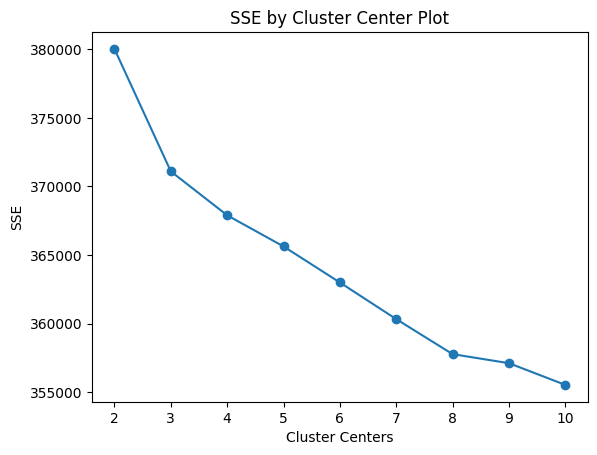

In [61]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(des_embeddings, 10)

In [62]:
clusters = MiniBatchKMeans(n_clusters=3, init_size=1024, batch_size=2048, random_state=20).fit_predict(des_embeddings)
clusters.shape

(8807,)

In [63]:
min(clusters)

0

In [64]:
def plot_tsne_pca(data, labels):
    max_label = max(labels) + 1
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(data[max_items,:].todense())
    
    
    idx = np.random.choice(range(pca.shape[0]), size=3000, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]] #color map
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

In [86]:
cm.hsv(175, 222, 162)

(13, 0, 255, 255)

In [91]:
def plot_pca(data, labels):
    max_label = max(labels) + 1
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())    
    
    idx = np.random.choice(range(pca.shape[0]), size=3000, replace=False)
    label_subset = labels[max_items]
    #label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]] #color map

    cmap = []
    for clust in label_subset[idx]:
        if clust == 0:
            cmap.append('#dea2bc') #pink
        elif clust == 1:
            cmap.append('#afdea2') #green
        else:
            cmap.append('#a2c5de') #blue
     
    plt.scatter(pca[idx, 0], pca[idx, 1], c=cmap)
    plt.title('PCA Cluster Plot')
    plt.show()

In [66]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [67]:
tmp = sparse.csr_matrix(des_embeddings)
tmp

<8807x768 sparse matrix of type '<class 'numpy.float32'>'
	with 6763776 stored elements in Compressed Sparse Row format>

In [68]:
#get_top_keywords(des_embeddings, clusters, tfidf.get_feature_names(), 10)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


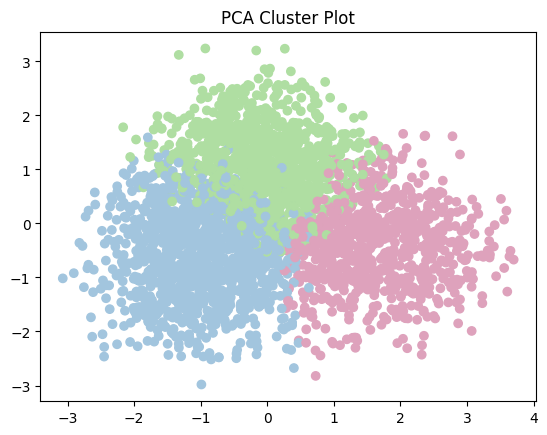

In [92]:
plot_pca(tmp, clusters)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/

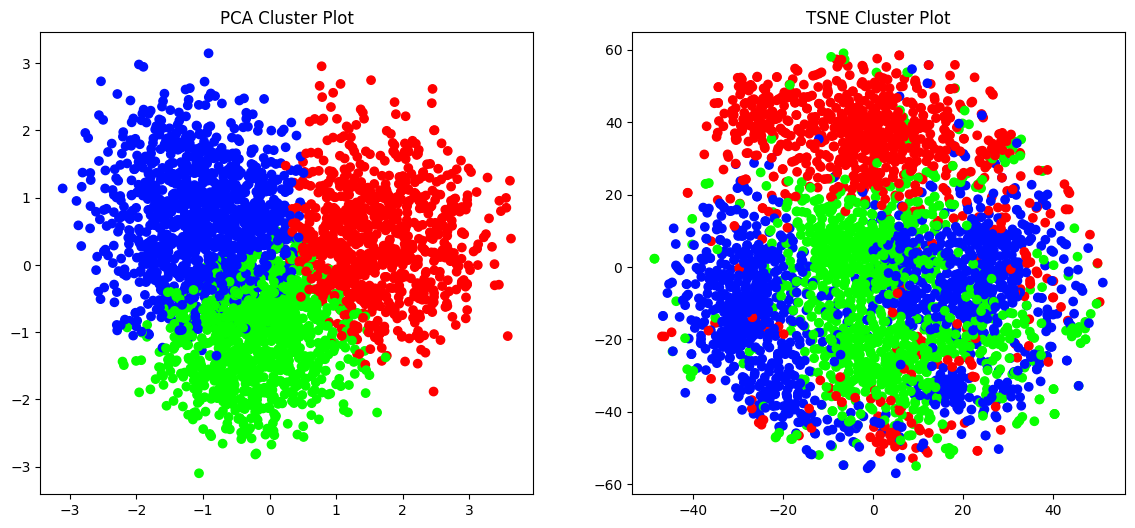

In [93]:
plot_tsne_pca(tmp, clusters)

In [94]:
clusters

array([2, 2, 1, ..., 1, 1, 2], dtype=int32)

In [95]:
clustered_df = df.copy()
clustered_df['Cluster Group'] = clusters
clustered_df

,Type,Title,Director Name,Cast,Country,Release Year,Rating,Duration,Genre,Description,Old Combined Text,Combined Text,Cluster Group
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Movie Dick Johnson Is Dead Kirsten Johnson Un...,Dick Johnson Is Dead United States PG-13 Docu...,2
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","TV Show Blood & Water Ama Qamata, Khosi Ngema...","Blood & Water Ama Qamata, Khosi Ngema, Gail Ma...",2
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,TV Show Ganglands Julien Leclercq Sami Bouajil...,"Ganglands Sami Bouajila, Tracy Gotoas, Samuel ...",1
3,TV Show,Jailbirds New Orleans,,,,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",TV Show Jailbirds New Orleans 2021 TV-MA 1 ...,"Jailbirds New Orleans TV-MA Docuseries, Real...",0
4,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"TV Show Kota Factory Mayur More, Jitendra Kum...","Kota Factory Mayur More, Jitendra Kumar, Ranja...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...","Movie Zodiac David Fincher Mark Ruffalo, Jake ...","Zodiac Mark Ruffalo, Jake Gyllenhaal, Robert D...",0
8803,TV Show,Zombie Dumb,,,,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",TV Show Zombie Dumb 2018 TV-Y7 2 Seasons Ki...,"Zombie Dumb TV-Y7 Kids' TV, Korean TV Shows,...",1
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Movie Zombieland Ruben Fleischer Jesse Eisenbe...,"Zombieland Jesse Eisenberg, Woody Harrelson, E...",1
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","Movie Zoom Peter Hewitt Tim Allen, Courteney C...","Zoom Tim Allen, Courteney Cox, Chevy Chase, Ka...",1


In [96]:
cluster1 = clustered_df.loc[clustered_df['Cluster Group'] == 0]
cluster1

,Type,Title,Director Name,Cast,Country,Release Year,Rating,Duration,Genre,Description,Old Combined Text,Combined Text,Cluster Group
3,TV Show,Jailbirds New Orleans,,,,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",TV Show Jailbirds New Orleans 2021 TV-MA 1 ...,"Jailbirds New Orleans TV-MA Docuseries, Real...",0
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,TV Show The Great British Baking Show Andy Dev...,"The Great British Baking Show Mel Giedroyc, Su...",0
14,TV Show,Crime Stories: India Detectives,,,,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...,TV Show Crime Stories: India Detectives 202...,Crime Stories: India Detectives TV-MA Britis...,0
23,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",,2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...,Movie Go! Go! Cory Carson: Chrissy Takes the W...,Go! Go! Cory Carson: Chrissy Takes the Wheel M...,0
38,Movie,Birth of the Dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States",2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...,Movie Birth of the Dragon George Nolfi Billy M...,"Birth of the Dragon Billy Magnussen, Ron Yuan,...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,Movie,World's Weirdest Homes,Storm Theunissen,Charlie Luxton,,2015,TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...,Movie World's Weirdest Homes Storm Theunissen ...,World's Weirdest Homes Charlie Luxton TV-PG M...,0
8763,Movie,WWII: Report from the Aleutians,John Huston,,United States,1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,Movie WWII: Report from the Aleutians John Hus...,WWII: Report from the Aleutians United States...,0
8765,Movie,XX,"Jovanka Vuckovic, Annie Clark, Roxanne Benjami...","Natalie Brown, Jonathan Watton, Melanie Lynske...","Canada, United States",2017,R,81 min,Horror Movies,This four-part anthology of short horror films...,"Movie XX Jovanka Vuckovic, Annie Clark, Roxann...","XX Natalie Brown, Jonathan Watton, Melanie Lyn...",0
8779,Movie,Yes or No 2.5,Kirati Nakintanon,"Supanart Jittaleela, Pimpakan Bangchawong, Cha...",Thailand,2015,TV-PG,107 min,"International Movies, LGBTQ Movies, Romantic M...",Roommates Wine and Pie find their lives turned...,Movie Yes or No 2.5 Kirati Nakintanon Supanart...,"Yes or No 2.5 Supanart Jittaleela, Pimpakan Ba...",0


In [97]:
cluster2 = clustered_df.loc[clustered_df['Cluster Group'] == 1]
cluster2

,Type,Title,Director Name,Cast,Country,Release Year,Rating,Duration,Genre,Description,Old Combined Text,Combined Text,Cluster Group
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,TV Show Ganglands Julien Leclercq Sami Bouajil...,"Ganglands Sami Bouajila, Tracy Gotoas, Samuel ...",1
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,TV Show Midnight Mass Mike Flanagan Kate Siege...,"Midnight Mass Kate Siegel, Zach Gilford, Hamis...",1
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Movie My Little Pony: A New Generation Robert ...,My Little Pony: A New Generation Vanessa Hudge...,1
10,TV Show,"Vendetta: Truth, Lies and The Mafia",,,,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B...","TV Show Vendetta: Truth, Lies and The Mafia ...","Vendetta: Truth, Lies and The Mafia TV-MA Cr...",1
11,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",TV Show Bangkok Breaking Kongkiat Komesiri Suk...,"Bangkok Breaking Sukollawat Kanarot, Sushar Ma...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8799,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,"Movie Zenda Avadhoot Gupte Santosh Juvekar, Si...","Zenda Santosh Juvekar, Siddharth Chandekar, Sa...",1
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,"Movie Zinzana Majid Al Ansari Ali Suliman, Sal...","Zinzana Ali Suliman, Saleh Bakri, Yasa, Ali Al...",1
8803,TV Show,Zombie Dumb,,,,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",TV Show Zombie Dumb 2018 TV-Y7 2 Seasons Ki...,"Zombie Dumb TV-Y7 Kids' TV, Korean TV Shows,...",1
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Movie Zombieland Ruben Fleischer Jesse Eisenbe...,"Zombieland Jesse Eisenberg, Woody Harrelson, E...",1


In [98]:
cluster3 = clustered_df.loc[clustered_df['Cluster Group'] == 2]
cluster3

,Type,Title,Director Name,Cast,Country,Release Year,Rating,Duration,Genre,Description,Old Combined Text,Combined Text,Cluster Group
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Movie Dick Johnson Is Dead Kirsten Johnson Un...,Dick Johnson Is Dead United States PG-13 Docu...,2
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","TV Show Blood & Water Ama Qamata, Khosi Ngema...","Blood & Water Ama Qamata, Khosi Ngema, Gail Ma...",2
4,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"TV Show Kota Factory Mayur More, Jitendra Kum...","Kota Factory Mayur More, Jitendra Kumar, Ranja...",2
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","Movie Sankofa Haile Gerima Kofi Ghanaba, Oyafu...","Sankofa Kofi Ghanaba, Oyafunmike Ogunlano, Ale...",2
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Movie The Starling Theodore Melfi Melissa McCa...,"The Starling Melissa McCarthy, Chris O'Dowd, K...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,Movie Young Adult Jason Reitman Charlize Thero...,"Young Adult Charlize Theron, Patton Oswalt, Pa...",2
8793,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...,"Movie Yours, Mine and Ours Raja Gosnell Dennis...","Yours, Mine and Ours Dennis Quaid, Rene Russo,...",2
8797,TV Show,Zak Storm,,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,"TV Show Zak Storm Michael Johnston, Jessica G...","Zak Storm Michael Johnston, Jessica Gee-George...",2
8800,TV Show,Zindagi Gulzar Hai,,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...","TV Show Zindagi Gulzar Hai Sanam Saeed, Fawad...","Zindagi Gulzar Hai Sanam Saeed, Fawad Khan, Ay...",2


In [103]:
def genre_counts(df, title):
    genre = df['Genre']
    genre_explode = genre.str.rsplit(',').explode('Genre')
    genre_plot = genre_explode.value_counts().plot(kind='bar',
                                        figsize=(15,9),
                                        title=title)
    genre_plot.set(xlabel='Genre', ylabel='Movie/TV Show Count')
    return genre_explode.value_counts()

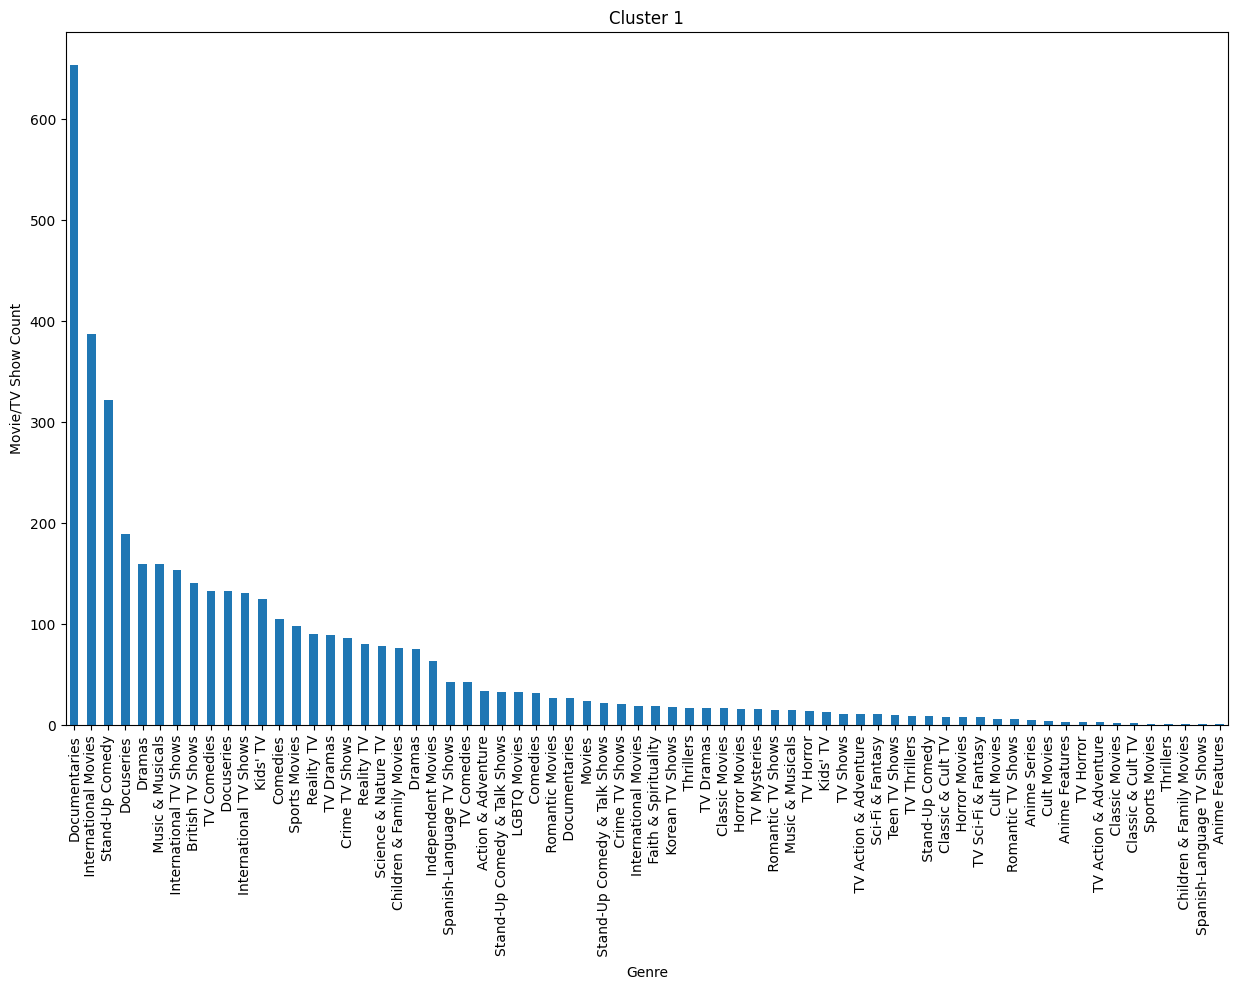

In [105]:
c1_genres = genre_counts(cluster1, 'Cluster 1')

In [143]:
count = 0
for i in range(len(cluster1)):
    genre = cluster1.iloc[i,8]
    if 'Documentaries' in genre:
        count += 1
    elif 'Docuseries' in genre:
        count += 1
print(len(cluster1))
count/len(cluster1) #percent Documentaries

2333


0.4299185597942563

In [127]:
'Docuseries' in cluster1.iloc[0,8]

True

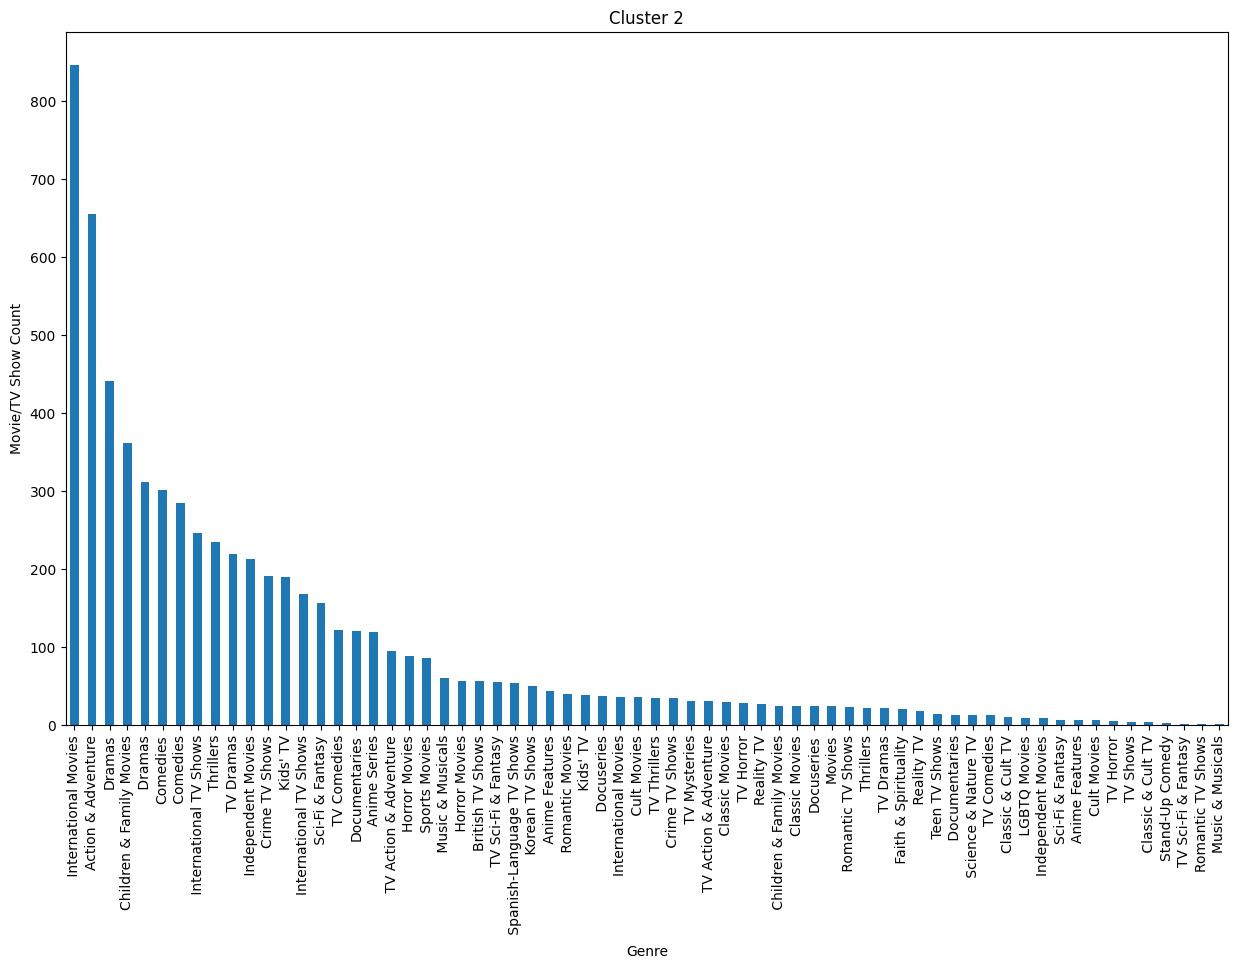

In [106]:
c2_genres = genre_counts(cluster2, 'Cluster 2')

In [142]:
count = 0
for i in range(len(cluster2)):
    genre = cluster2.iloc[i,8]
    if 'Action & Adventure' in genre:
        count += 1
    elif 'TV Action & Adventure' in genre:
        count += 1
    elif 'TV Dramas' in genre:
        count += 1
    elif 'Dramas' in genre:
        count += 1
print(len(cluster2))
count/len(cluster2) #percent Action & Adventure, Drama

2958


0.5311020960108181

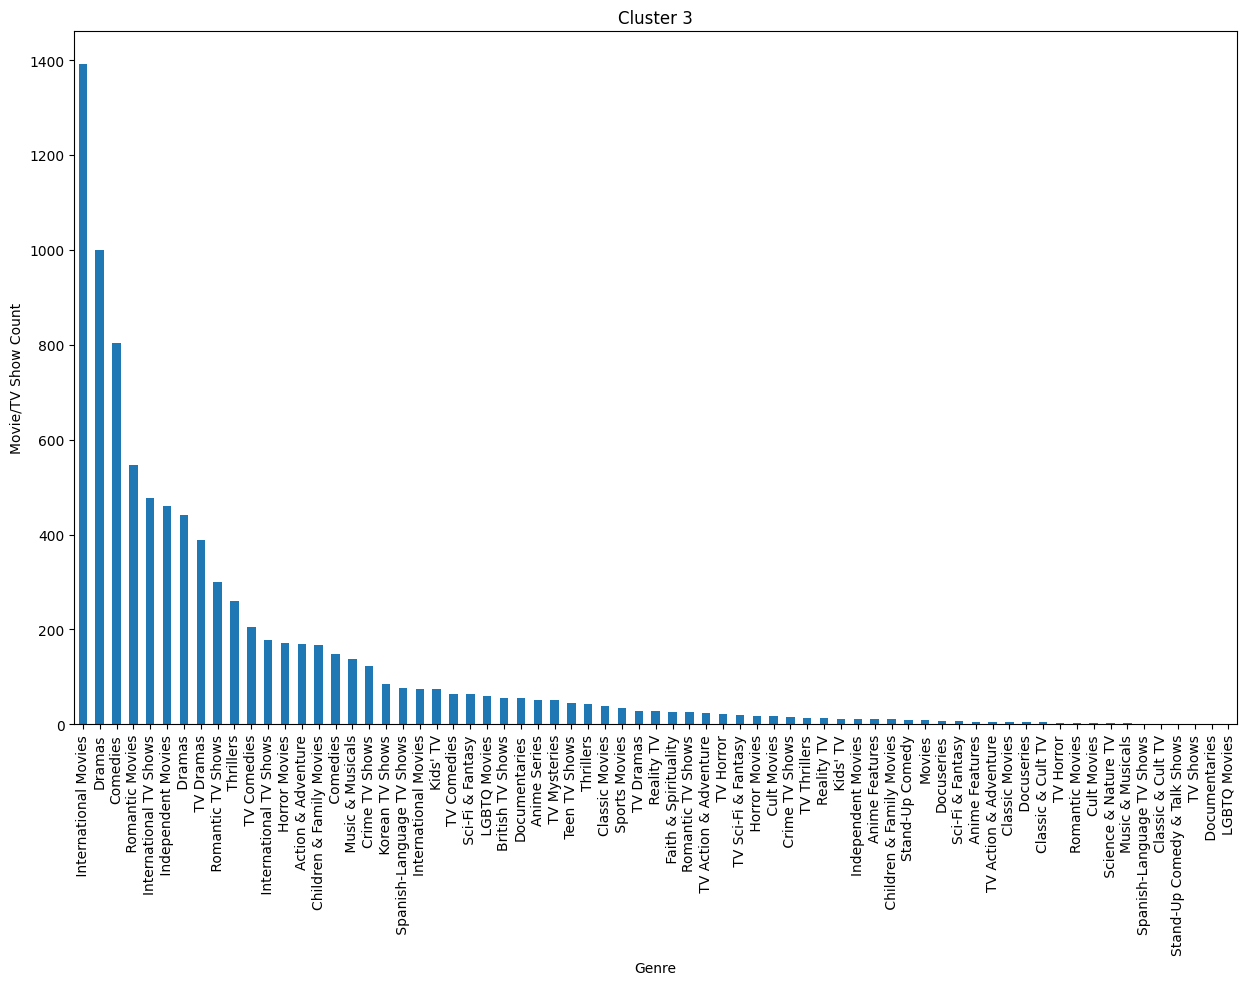

In [107]:
c3_genres = genre_counts(cluster3, 'Cluster 3')

In [141]:
count = 0
for i in range(len(cluster3)):
    genre = cluster3.iloc[i,8]
    if 'Dramas' in genre:
        count += 1
    elif 'TV Dramas' in genre:
        count += 1
    elif 'Comedies' in genre:
        count += 1
    elif 'TV Comedies' in genre:
        count += 1
    elif 'Romantic Movies' in genre:
        count += 1
    elif 'Romantic TV Shows' in genre:
        count += 1
print(len(cluster3))
count/len(cluster3) #percent Drama, Comedy, Romance

3516


0.8074516496018203

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f5e5435f-ab41-42dd-b4bc-a0d6a761aca4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>